In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

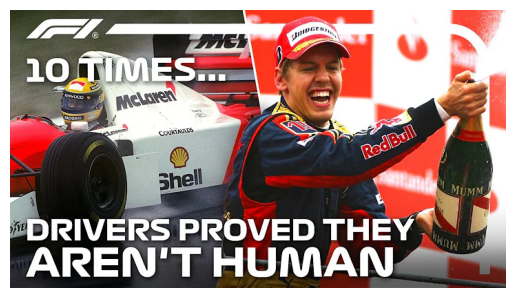

In [3]:
img_path = 'images/thumbnail-4.webp'

img = cv2.imread(img_path)

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

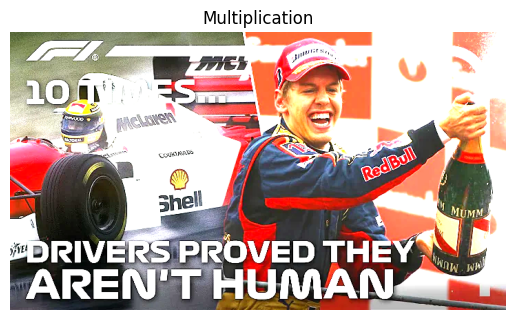

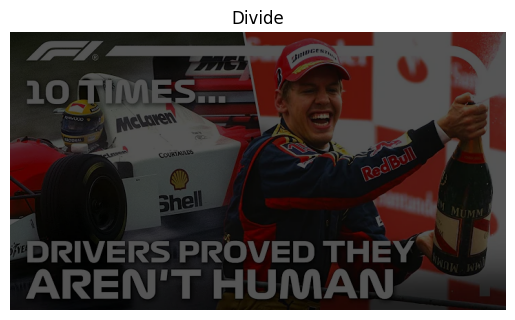

In [4]:
def display(img,title="some"):
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()


mul = cv2.multiply(img,np.array([2.0,2.0,2.0]))
div = cv2.divide(img,np.array([3.0,3.0,3.0]))

display(mul,"Multiplication")
display(div,"Divide")

(-0.5, 719.5, 403.5, -0.5)

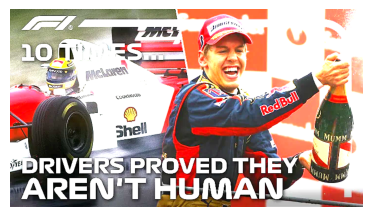

In [5]:
#multiply and division scratch 
img_mul = img.copy()
img_div = img.copy()

r,c,f = img_mul.shape

for i in range(r):
    for j in range(c):
        img_mul[i][j] = np.clip(img_mul[i][j]*2.0,0,255)
        img_div[i][j] = img_div[i][j]//3

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.imshow(img_mul)
plt.axis('off')


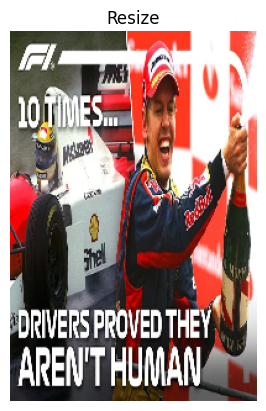

In [6]:
#Resize the image
img_re = cv2.resize(img.copy(),[200,300])

display(img_re,"Resize")

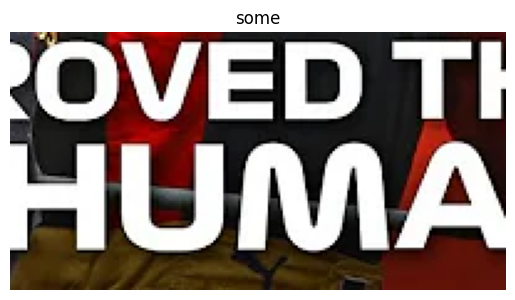

In [7]:
# Image Slicing already scratch
img_slc = img[300:500,300:500]

display(img_slc)

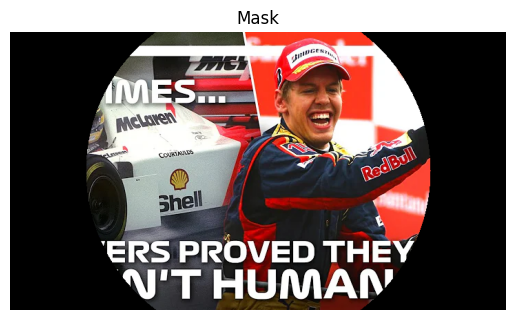

In [8]:
#mask already Scratch
mask = np.zeros_like(img)
center=(img.shape[1]//2,img.shape[0]//2)
radius = 250
cv2.circle(mask,center,radius,(255,255,255),-1)
img_msk = cv2.bitwise_and(img,mask)

display(img_msk,"Mask")


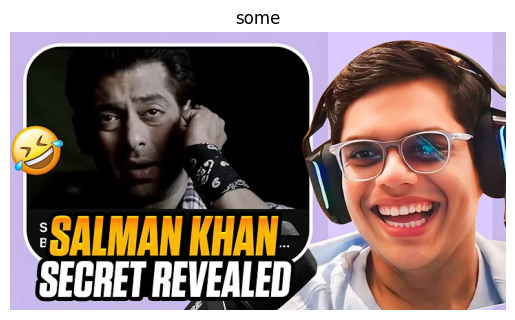

In [9]:
img_path = "images/thumbnail-1.webp"
img2 = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)
display(img2)

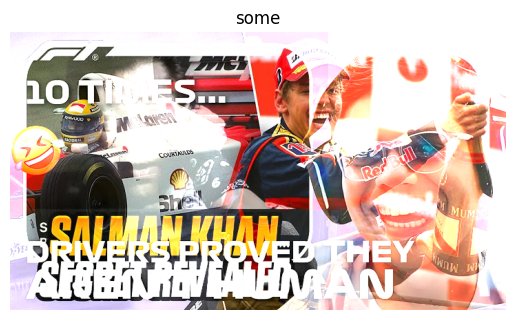

In [10]:
img_add = cv2.add(img,img2)
display(img_add)

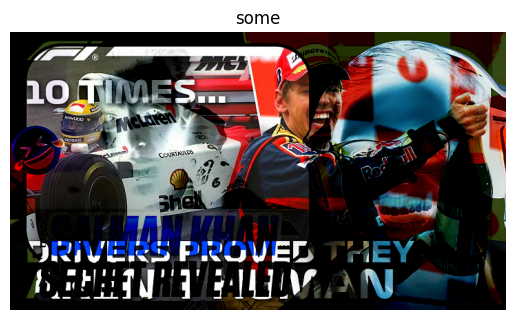

In [11]:
img_min = cv2.subtract(img,img2)
display(img_min)

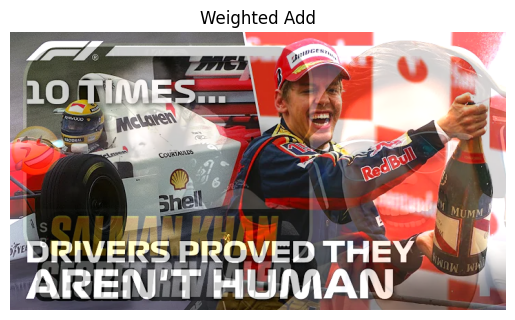

In [12]:
#Addition Weighted
alpha=0.8
beta = 0.3
img_addw = cv2.addWeighted(img,alpha,img2,beta,0.0)
display(img_addw,"Weighted Add")

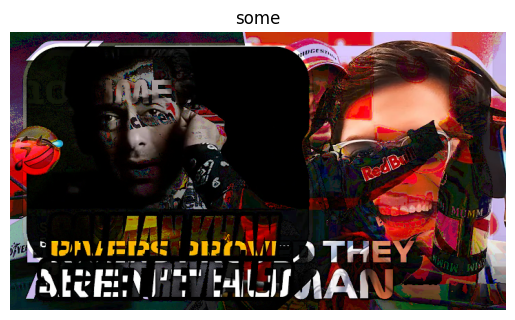

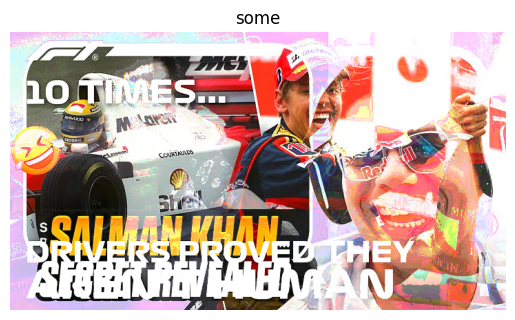

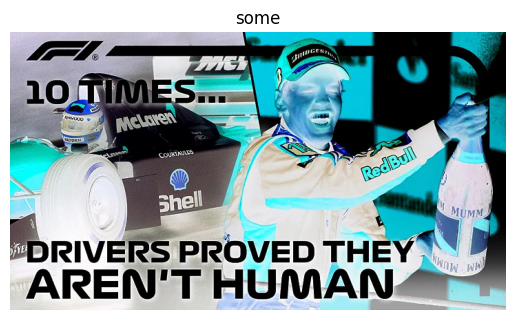

In [13]:
#bitwise and,or,not
img_bitadd = cv2.bitwise_and(img,img2)
display(img_bitadd)
img_bitor = cv2.bitwise_or(img,img2)
display(img_bitor)
img_bitnot = cv2.bitwise_not(img)
display(img_bitnot)

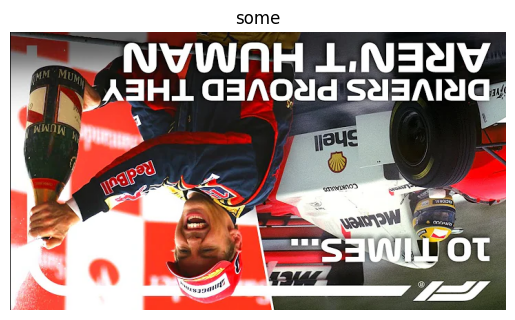

In [14]:
# Rotation
def rotate_image(image, angle, center=None, scale=1.0):

    # Get image dimensions
    height, width = image.shape[:2]
    
    # Set center point if not provided
    if center is None:
        center = (width // 2, height // 2)
    
    # Get rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    
    # Perform rotation
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    
    return rotated_image

img_rt = rotate_image(img,180)
display(img_rt)

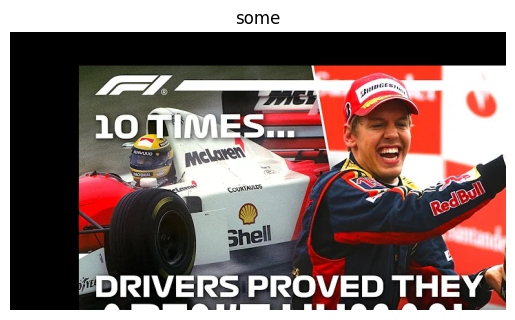

In [15]:
# image Translation
import cv2
import numpy as np

def translate_image(image, x_shift, y_shift):
    """
    Translate an image by x and y pixels.
    
    Args:
        image: Input image array
        x_shift: Horizontal shift (positive = right)
        y_shift: Vertical shift (positive = down)
    
    Returns:
        Translated image array
    """
    rows, cols = image.shape[:2]
    
    # Create translation matrix
    translation_matrix = np.float32([[1, 0, x_shift],
                                   [0, 1, y_shift]])
    
    # Apply translation
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    
    return translated_image

translated = translate_image(img, 100, 50)  # Move right 100px, down 50px
cv2.imwrite('translated.jpg', translated)
display(translated)

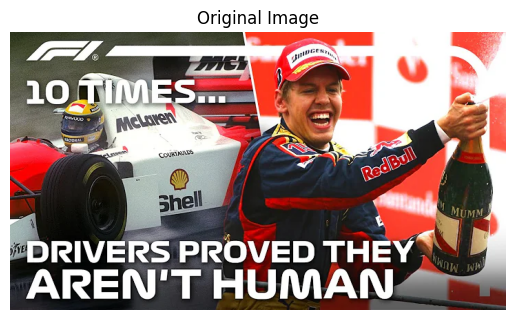

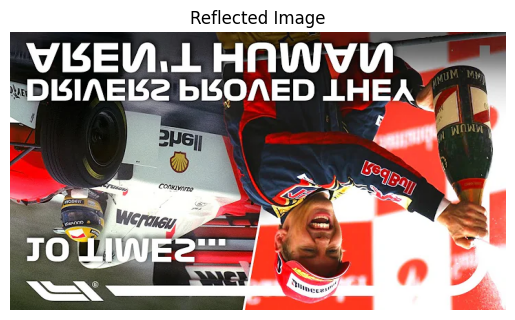

In [21]:
rows, cols = img.shape[:2:1]
M = np.float32([[1, 0, 0],
				[0, -1, rows],
				[0, 0, 1]])
reflected_img = cv2.warpPerspective(img, M,
								(int(cols),
									int(rows)))

display(img,"Original Image")

display(reflected_img,"Reflected Image")


Four Neighbors: [(49, 50), (51, 50), (50, 49), (50, 51)]
Eight Neighbors: [(49, 50), (51, 50), (50, 49), (50, 51), (49, 49), (49, 51), (51, 49), (51, 51)]


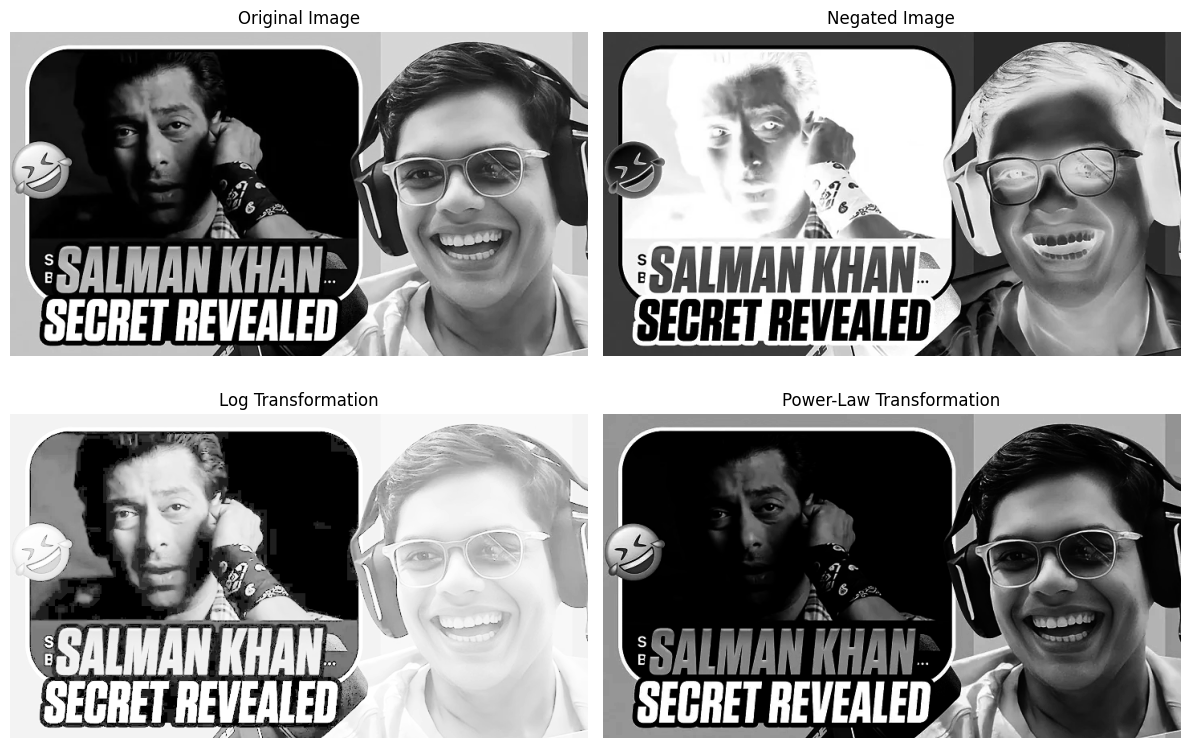

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# 1. Four Neighbors and Eight Neighbors
def get_neighbors(image, x, y):
    rows, cols = image.shape
    neighbors_4 = []
    neighbors_8 = []

    # Four neighbors
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        if 0 <= x + dx < rows and 0 <= y + dy < cols:
            neighbors_4.append((x + dx, y + dy))
            neighbors_8.append((x + dx, y + dy))

    # Diagonal neighbors for eight neighbors
    for dx, dy in [(-1, -1), (-1, 1), (1, -1), (1, 1)]:
        if 0 <= x + dx < rows and 0 <= y + dy < cols:
            neighbors_8.append((x + dx, y + dy))

    return neighbors_4, neighbors_8

# Test neighbors
x, y = 50, 50  # Example pixel coordinates
neighbors_4, neighbors_8 = get_neighbors(image, x, y)
print("Four Neighbors:", neighbors_4)
print("Eight Neighbors:", neighbors_8)

# 2. Distance Formula
def distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# 3. Image Negation
negated_image = 255 - image

# 4. Log Transformation
c = 1
log_transformed = c * np.log1p(image)
log_transformed = np.uint8(255 * log_transformed / np.max(log_transformed))

# 5. Power-Law Transformation
gamma = 2.0
c = 1
power_law_transformed = c * np.power(image / 255.0, gamma)
power_law_transformed = np.uint8(255 * power_law_transformed)

# Display Results
titles = ['Original Image', 'Negated Image', 'Log Transformation', 'Power-Law Transformation']
images = [image, negated_image, log_transformed, power_law_transformed]

plt.figure(figsize=(12, 8))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()


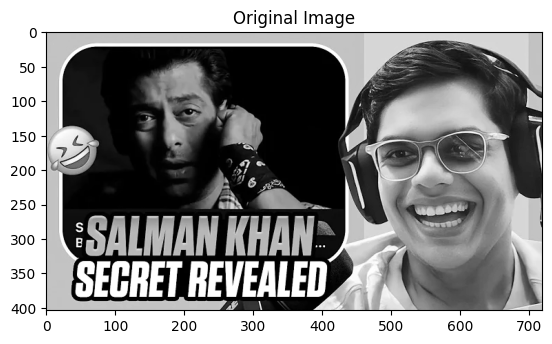

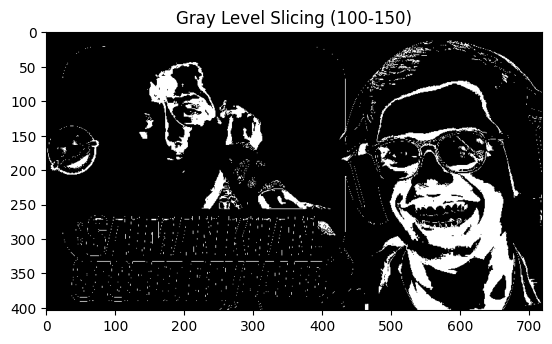

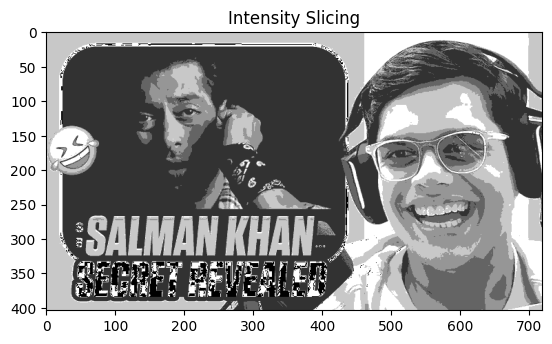

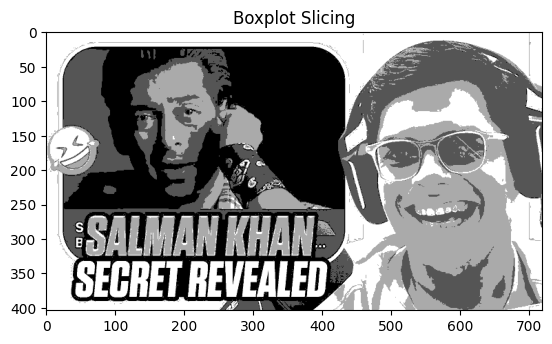

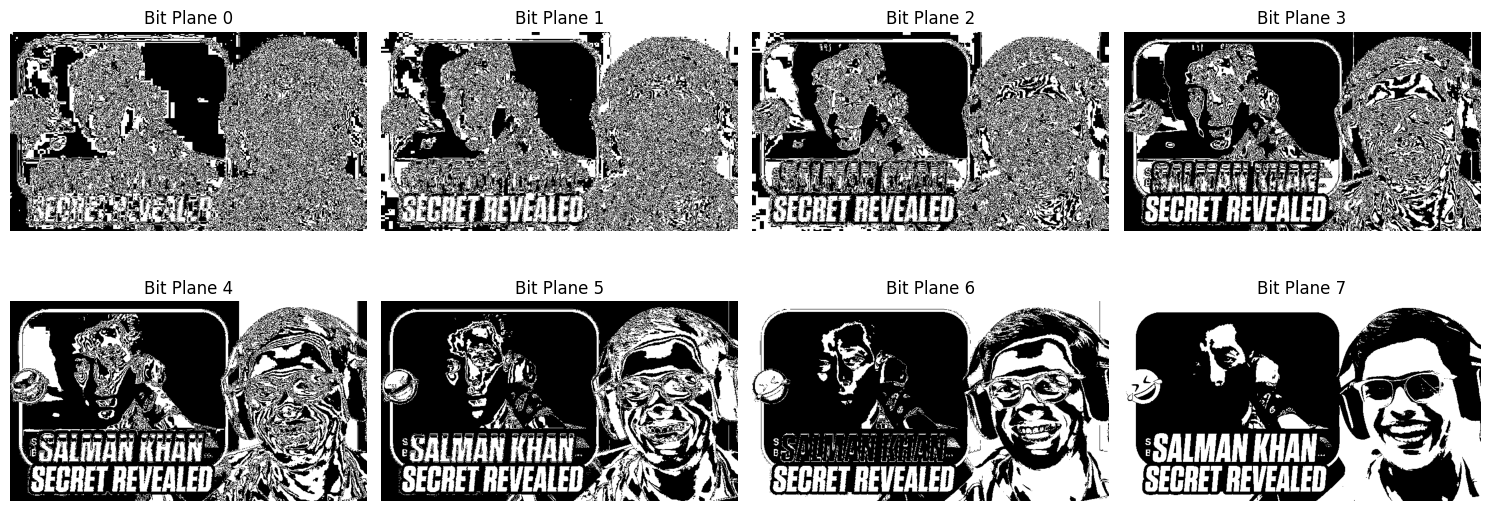

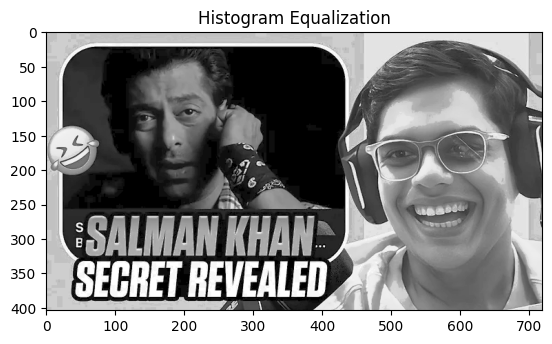

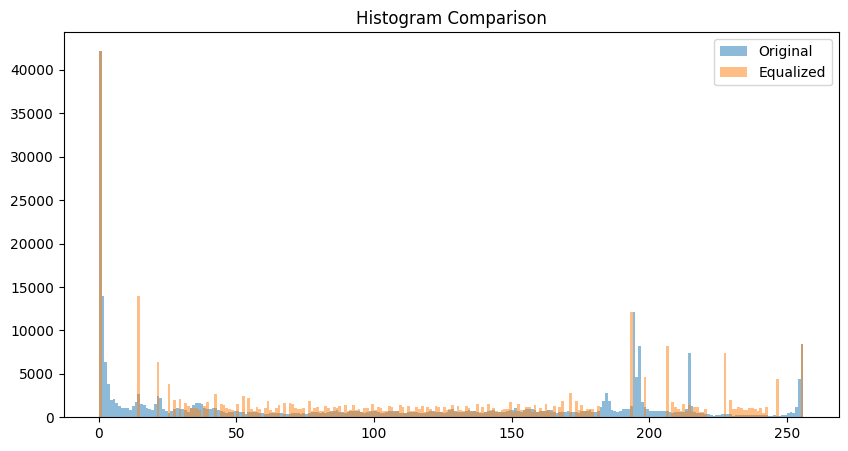

In [27]:
# Gray level Slicing, Intensity slicing, Boxplot slicing, Bit plane slicing, Histogram Equalizer
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# Load the grayscale image 
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
# Display original image 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.show() 
# 1. Gray Level Slicing 
def gray_level_slicing(image, lower, upper, highlight_value=255, background_value=0): 
    sliced_image = np.where((image >= lower) & (image <= upper), highlight_value, background_value) 
    return sliced_image.astype(np.uint8) 

gray_sliced = gray_level_slicing(image, lower=100, upper=150) 
plt.imshow(gray_sliced, cmap='gray') 
plt.title("Gray Level Slicing (100-150)") 
plt.show() 

# 2. Intensity Slicing 
def intensity_slicing(image, levels): 
    sliced_image = np.zeros_like(image) 
    interval = 256 // len(levels) 
    for i, value in enumerate(levels): 
        lower = i * interval 
        upper = lower + interval 
        sliced_image[(image >= lower) & (image < upper)] = value 
    return sliced_image 
 
levels = [50, 100, 150, 200, 255]  # Example intensity levels 
intensity_sliced = intensity_slicing(image, levels) 
plt.imshow(intensity_sliced, cmap='gray') 
plt.title("Intensity Slicing") 
plt.show() 
 
# 3. Boxplot Slicing 
def boxplot_slicing(image): 
    boxplot_values = np.percentile(image, [25, 50, 75])  # Calculate Q1, Median, Q3 
    sliced_image = np.where(image < boxplot_values[0], 0, 
                    np.where(image < boxplot_values[1], 85, 
                    np.where(image < boxplot_values[2], 170, 255))) 
    return sliced_image.astype(np.uint8) 
 
boxplot_sliced = boxplot_slicing(image) 
plt.imshow(boxplot_sliced, cmap='gray') 
plt.title("Boxplot Slicing") 
plt.show() 
 
# 4. Bit Plane Slicing 
def bit_plane_slicing(image, bit_level): 
    return ((image >> bit_level) & 1) * 255 
 
# Displaying all 8 bit planes 
bit_planes = [bit_plane_slicing(image, i) for i in range(8)] 
 
fig, axes = plt.subplots(2, 4, figsize=(15, 6)) 
for i, ax in enumerate(axes.flatten()): 
    ax.imshow(bit_planes[i], cmap='gray') 
    ax.set_title(f'Bit Plane {i}') 
    ax.axis('off') 
plt.tight_layout() 
plt.show() 
 
# 5. Histogram Equalization 
equalized_image = cv2.equalizeHist(image) 
plt.imshow(equalized_image, cmap='gray') 
plt.title("Histogram Equalization") 
plt.show() 
 
plt.figure(figsize=(10, 5)) 
plt.hist(image.ravel(), bins=256, range=(0, 256), alpha=0.5, label='Original') 
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), alpha=0.5, label='Equalized') 
plt.title("Histogram Comparison") 
plt.legend() 
plt.show()

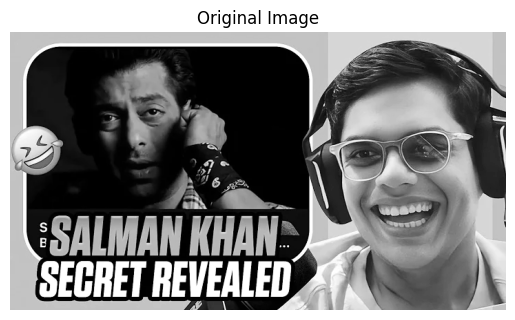

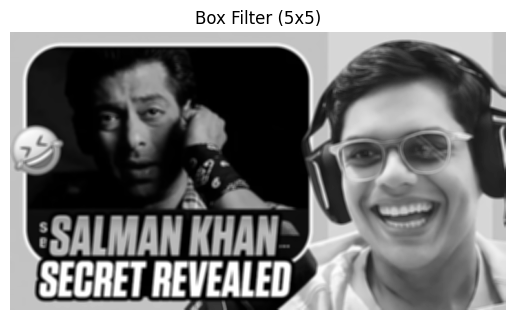

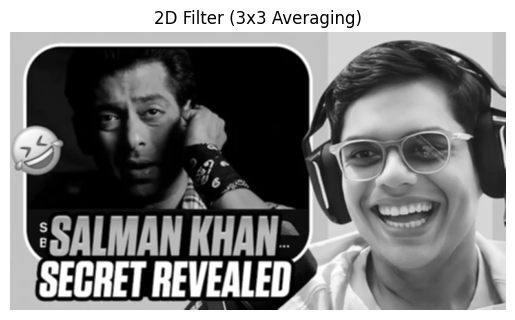

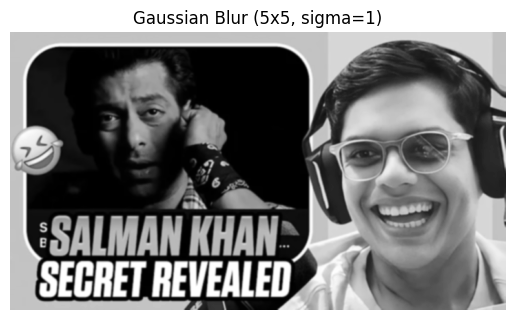

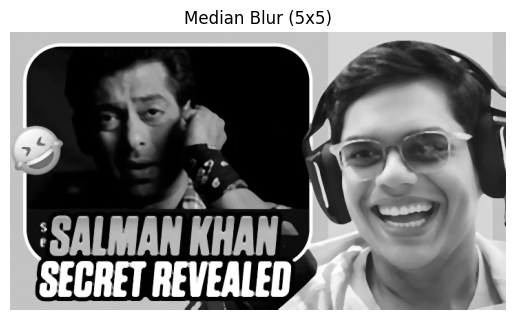

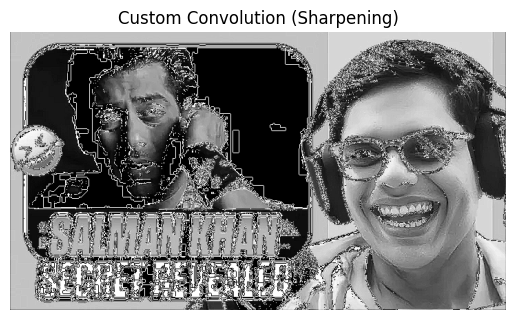

In [32]:
# Box filters, filter 2D, Gaussian Blur, and Median Blur, & write a program to hardcode 
# convolution using a kernel of known size & value 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
# Load the image 
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
# Display original image 
plt.imshow(image, cmap='gray') 
plt.title("Original Image") 
plt.axis('off') 
plt.show() 
# 1. Box Filter 
box_filter = cv2.blur(image, (5, 5))  # Kernel size: 5x5 
plt.imshow(box_filter, cmap='gray') 
plt.title("Box Filter (5x5)") 
plt.axis('off') 
plt.show() 
# 2. Filter 2D 
kernel = np.array([[1, 1, 1],  
[1, 1, 1],  
[1, 1, 1]], dtype=np.float32) / 9  # 3x3 averaging kernel 
filter_2d = cv2.filter2D(image, -1, kernel) 
plt.imshow(filter_2d, cmap='gray') 
plt.title("2D Filter (3x3 Averaging)") 
plt.axis('off') 
plt.show() 
# 3. Gaussian Blur 
gaussian_blur = cv2.GaussianBlur(image, (5, 5), sigmaX=1) 
plt.imshow(gaussian_blur, cmap='gray') 
plt.title("Gaussian Blur (5x5, sigma=1)") 
plt.axis('off') 
plt.show() 
# 4. Median Blur 
median_blur = cv2.medianBlur(image, 5)  # Kernel size: 5 
plt.imshow(median_blur, cmap='gray') 
plt.title("Median Blur (5x5)") 
plt.axis('off') 
plt.show() 

# 5. Hardcoded Convolution 
def hardcoded_convolution(image, kernel): 
    kernel_height, kernel_width = kernel.shape 
    pad_h, pad_w = kernel_height // 2, kernel_width // 2 
    # Pad the image with zeros 
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', 
    constant_values=0) 
    # Prepare output image 
    output = np.zeros_like(image) 
    # Perform convolution 
    for i in range(image.shape[0]): 
        for j in range(image.shape[1]): 
            region = padded_image[i:i+kernel_height, j:j+kernel_width] 
            output[i, j] = np.sum(region * kernel) 
    # Normalize output to range 0-255 
    output = np.clip(output, 0, 255).astype(np.uint8) 
    return output
    
# Example kernel for convolution 
custom_kernel = np.array([[0, -1, 0], 
                          [-1, 5, -1], 
                          [0, -1, 0]])  # Example sharpening kernel 
custom_convolution = hardcoded_convolution(image, custom_kernel) 
plt.imshow(custom_convolution, cmap='gray') 
plt.title("Custom Convolution (Sharpening)") 
plt.axis('off') 
plt.show() 




In [ ]:
def edge_detection(img):
   gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
   # Roberts
   roberts_x = np.array([[1, 0], [0, -1]])
   roberts_y = np.array([[0, 1], [-1, 0]])
   rob_x = cv2.filter2D(gray, -1, roberts_x)
   rob_y = cv2.filter2D(gray, -1, roberts_y)
   roberts = np.sqrt(np.square(rob_x) + np.square(rob_y))
   
   # Sobel
   sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
   sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
   sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
   
   # Canny
   canny = cv2.Canny(gray, 100, 200)
   
   return {'roberts':roberts, 'sobel':sobel, 'canny':canny}

